# 線性幾何（Linear Geometry）

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

_Tested on SageMath version 8.7_

## 點與線

### 點
空間的一個點  
以及空間中的一個向量  
都是由一組數對來表示

$(1,2,3)$ 可以表示一個點  
也可以表示起點在原點、終點在 $(1,2,3)$ 的一個向量

比如說  
$(1,2,3) + (3,2,1)$  
可以解釋成：
1. 從點 $(1,2,3)$ 往 $(3,2,1)$ 的方向移動，或是
2. 向量 $(1,2,3)$ 和向量 $(3,2,1)$ 相加  

結果是一樣的，但可以有不同的解釋法

### 線
向量也可以代表一個線段  

比如說向量 $(1,2)$  
可以代表 $(0,0)$ 到 $(1,2)$ 的這個線段  
而這個線段的長度為 $\sqrt{1^2 + 2^2} = \sqrt{5}$

In [25]:
v = vector([1,2])
v.norm()

sqrt(5)

一般來說  
向量 ${\bf v} = (a_1,\ldots,a_n)$ 的**長度**定為  
$|{\bf v}| = \sqrt{a_1^2 + \cdots + a_n^2}$

In [27]:
l = [1,2,3,4,5]
print(sqrt(sum(k^2 for k in l)))
print(vector(l).norm())

sqrt(55)
sqrt(55)


長度有以下的性質：
1. $|{\bf v}|\geq 0$
2. $|{\bf v}| = 0$ if and only if ${\bf v} = (0,\ldots,0)$
3. $|{\bf v}| = \sqrt{{\bf v}\cdot{\bf v}}$
4. $|{\bf u} + {\bf v}|^2 = |{\bf u}|^2 + {\bf u}\cdot{\bf v} + {\bf v}\cdot{\bf u} + |{\bf v}|^2$  
   若 ${\bf u}$ 和 ${\bf v}$ 都是實數的向量，則 ${\bf u}\cdot{\bf v} = {\bf v}\cdot{\bf u}$

來測試一下

In [32]:
u = vector([1,2,3])
v = vector([3,2,1])
w = u + v
print("|u + v|^2 = %s"%(w.norm()^2))
print("|u|^2 = %s"%(u.norm()^2))
print("u dot v = %s, v dot u = %s"%(u.dot_product(v), v.dot_product(u)))
print("|v|^2 = %s"%(v.norm()^2))

|u + v|^2 = 48
|u|^2 = 14
u dot v = 10, v dot u = 10
|v|^2 = 14


若 ${\bf u} = (a_1,\ldots,a_n)$  
和 ${\bf v} = (b_1,\ldots,b_n)$
為空間中兩點  
則兩點之間的矩離為  
$\sqrt{(a_1-b_1)^2 + \cdots (a_n-b_n)^2}$  
剛好也就是 ${\bf u} - {\bf v}$ 的長度 $|{\bf u} - {\bf v}|$

所以在儘管在高維度裡  
我們還是知道  
${\bf u} = (2,2,1,1,1,1)$  
${\bf v} = (1,1,2,2,1,1)$  
${\bf w} = (1,1,1,1,2,2)$  
是一個正三角形的三個頂點

In [35]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,2,2,1,1])
w = vector([1,1,1,1,2,2])
print('|u - v|^2 = %s'%(u-v).norm()^2)
print('|v - w|^2 = %s'%(v-w).norm()^2)
print('|w - u|^2 = %s'%(w-u).norm()^2)

|u - v|^2 = 4
|v - w|^2 = 4
|w - u|^2 = 4


而  
${\bf u} = (2,2,1,1,1,1)$  
${\bf v} = (1,1,1,1,1,1)$  
${\bf w} = (1,1,1,1,2,2)$  
是一個等腰直角三角形的三個頂點

In [36]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,1,1,1,1])
w = vector([1,1,1,1,2,2])
print('|u - v|^2 = %s'%(u-v).norm()^2)
print('|v - w|^2 = %s'%(v-w).norm()^2)
print('|w - u|^2 = %s'%(w-u).norm()^2)

|u - v|^2 = 2
|v - w|^2 = 2
|w - u|^2 = 4


#### 餘絃定理
若一三角形的三邊長為 $a$, $b$, $c$  
且 $a$, $b$ 兩邊的夾角為 $\theta$  
則 $a^2 + b^2 - 2ab\cos\theta = c^2$

當 $\theta = 90^\circ$ 時  
$\cos\theta = 0$ 而餘絃定理可以推導出畢氏定理

更重要的是  
只要知道三邊長  
我們就知道夾角的大小  
$\cos\theta = \frac{a^2 + b^2 - c^2}{2ab}$

因此在高維度中  
我們也可以算出 $\overline{{\bf v}{\bf u}}$ 和 $\overline{{\bf v}{\bf w}}$ 的夾角 $\theta$ 為  
$\cos\theta = \frac{|{\bf u} - {\bf v}|^2 + |{\bf w} - {\bf v}|^2 - |{\bf u} - {\bf w}|^2}{2|{\bf u} - {\bf v}||{\bf w} - {\bf v}|}$

正三角形夾角為 $\theta = 60^\circ$  
$\cos\theta = 1/2$

In [39]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,2,2,1,1])
w = vector([1,1,1,1,2,2])
a = (u-v).norm()
b = (w-v).norm()
c = (u-w).norm()
print('a = |u - v| = %s'%(u-v).norm())
print('b = |w - v| = %s'%(w-v).norm())
print('c = |u - w| = %s'%(u-w).norm())
print('cos theta = %s'%((a^2 + b^2 - c^2)/2/a/b))

a = |u - v| = 2
b = |w - v| = 2
c = |u - w| = 2
cos theta = 1/2


等腰直角三角形的直角夾角為 $\theta = 90^\circ$  
$\cos\theta = 0$

In [40]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,1,1,1,1])
w = vector([1,1,1,1,2,2])
a = (u-v).norm()
b = (w-v).norm()
c = (u-w).norm()
print('a = |u - v| = %s'%(u-v).norm())
print('b = |w - v| = %s'%(w-v).norm())
print('c = |u - w| = %s'%(u-w).norm())
print('cos theta = %s'%((a^2 + b^2 - c^2)/2/a/b))

a = |u - v| = sqrt(2)
b = |w - v| = sqrt(2)
c = |u - w| = 2
cos theta = 0


##### 老師有沒有騙人？
二維、三維向量的長度是依照*經驗法則*來定義的  
高維度的向量是*感覺、好像、應該*這樣定義  
（畢竟沒人看過四維向量）  
高維度的三角形真的符合餘絃定理嗎？  
或是餘絃定理算出來的 $\cos\theta$ 是合理的嗎？  
（比如說 $|\cos\theta|\leq 1$？）

## 三角不等式、柯西不等式

考慮一個三角形  
方便起見，將一頂點置於原點  
所以假設這三角形的三頂點為  
原點、${\bf u}$、${\bf v}$

如此一來  
三角形的三邊長為  
$a = |{\bf u}|$  
$b = |{\bf v}|$  
$c = |{\bf u} - {\bf v}|$  
而令原點所在的夾角為 $\theta$

若餘絃定理在高維度都正確  
則 $\cos\theta = \frac{a^2 + b^2 - c^2}{2ab} = \frac{{\bf u}\cdot{\bf v}}{|{\bf u}||{\bf v}|}$  
（認真算看看第二個等式）

#### 三角不等式
若 $a$, $b$, $c$ 為三角形的三邊長  
則 $a+b\geq c$

In [2]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,2,2,1,1])
print('a = %s'%u.norm())
print('b = %s'%v.norm())
print('a+b = %s'%(u.norm() + v.norm()))
print('c = %s'%(u-v).norm())

a = 2*sqrt(3)
b = 2*sqrt(3)
a+b = 4*sqrt(3)
c = 2


#### 柯西不等式
若 ${\bf u}$, ${\bf v}$ 為兩向量  
則 ${\bf u}\cdot{\bf v} \leq |{\bf u}||{\bf v}|$  

等價的敘述：
對任意的實數 $a_i$, $b_i$  
$(a_1b_1 + \cdots + a_nb_n)^2 \leq (a_1^2 + \cdots + a_n^2)(b_1^2 + \cdots + b_n^2)$

In [3]:
u = vector([2,2,1,1,1,1])
v = vector([1,1,2,2,1,1])
print('u dot v = %s'%u.dot_product(v))
print('|u| = %s'%u.norm())
print('|v| = %s'%v.norm())
print('|u||v| = %s'%(u.norm() * v.norm()))

u dot v = 10
|u| = 2*sqrt(3)
|v| = 2*sqrt(3)
|u||v| = 12


換個角度想  
柯西不等式證明了  
$-1\leq\frac{{\bf u}\cdot{\bf v}}{|{\bf u}||{\bf v}|}\leq 1$  
因此將  
$\cos\theta$ 定義成 $\frac{{\bf u}\cdot{\bf v}}{|{\bf u}||{\bf v}|}$ 是一個合理的選擇

#### 數學模型的建構順序
1. $|{\bf u}|^2 \pm 2{\bf u}\cdot {\bf v} + |{\bf v}|^2 = |{\bf u} \pm {\bf v}|^2$ 可以用代數計算驗證
2. 由於有柯西不等式，定義 $\cos\theta$ 使得 ${\bf u}\cdot{\bf v} = |{\bf u}||{\bf v}|\cos\theta$，也藉由 $\cos\theta$ 來定義夾角 $\theta$  
3. 因此高維度裡也會有餘絃定理 $|{\bf u}|^2 - 2|{\bf u}||{\bf v}|\cos\theta + |{\bf v}|^2 = |{\bf u} - {\bf v}|^2$

所以利用 ${\bf u}\cdot{\bf v} = |{\bf u}||{\bf v}|\cos\theta$ 來證明柯西不等式是一個循環論證。

## 面、超平面、仿射平面

### 線性組合
若 ${\bf u}_1,\ldots, {\bf u}_k$ 為同一空間中的 $k$ 個向量  
則任何 $c_1{\bf u}_1 + \cdots + c_k{\bf u}_k$ 形式的向量  
稱作它們的**線性組合**  
其中 $c_1,\ldots,c_k$ 為任意實數

令 $S = \{{\bf u}_1,\ldots, {\bf u}_k\}$  
定義 
$\operatorname{span}(S) = \{c_1{\bf u}_1 + \cdots + c_k{\bf u}_k: c_1,\ldots,c_k\in\mathbb{R}\}$  
為所有線性組合組成的集合

In [151]:
### required function to get better layout for vectors
from sage.plot.arrow import arrow

def vector_plot(v=None, start=None, dim=None, viewer='threejs', **kwds):
    if dim == None:
        dim = len(v)
    if dim == 2:
        if v == None:
            v = vector([0,0])
        if start == None:
            start = vector([0,0])
        pic = arrow(start, start+v, **kwds)
    if dim == 3:
        if v == None:
            v = vector([0,0,0])
        if start == None:
            start = vector([0,0,0])
        pic = arrow(start, start+v, viewer=viewer, **kwds)
    return pic

In [152]:
def draw_span(vectors, p=None, dim=None, viewer='threejs', width=5):
    """
    draw a span  
    
    viewer can be one of 'threejs', 'jmol', or 'tachyon'"""
    if dim == None:
        dim = len(vectors[0])
    if p == None:
        p = vector([0]*dim)
    num_vec = len(vectors)
    all_coefs = [coef for coef in Tuples(range(-width,width+1), num_vec) if sum(map(abs,coef)) < width]
    pic = vector_plot(dim=dim, viewer=viewer)
    for coefs in all_coefs:
        start = p + sum(coefs[i]*vectors[i] for i in range(num_vec))
        for i in range(num_vec):
            vec = vectors[i]
            if coefs[i] > 0:
                pic += vector_plot(vec, start, viewer=viewer)
            elif coefs[i] < 0:
                pic += vector_plot(-vec, start, viewer=viewer)
            else:
                pic += vector_plot(vec, start, viewer=viewer)
                pic += vector_plot(-vec, start, viewer=viewer)
    return pic

若 $S = \{{\bf u}_1\}$  
則 $\operatorname{span}(S)$ 通常為一條通過原點的直線  
（有可能不是一直線嗎？）

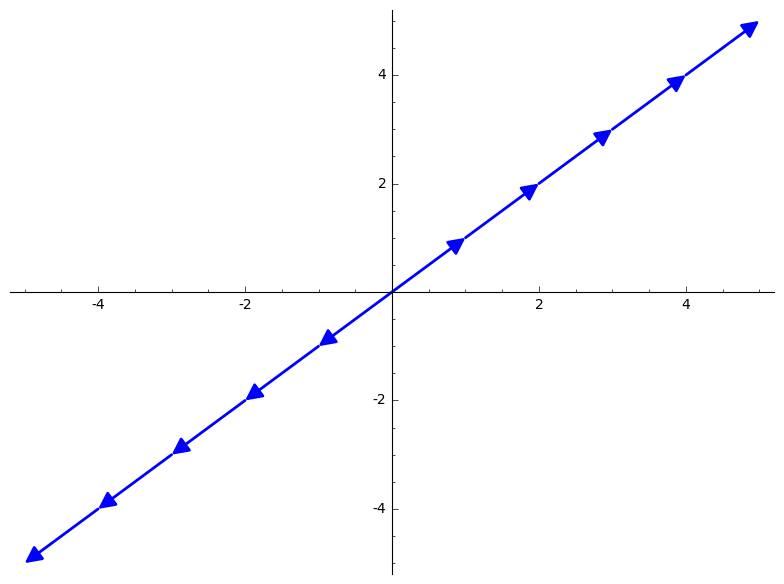

In [153]:
u = vector([1,1])
draw_span([u])

In [154]:
u = vector([1,1,1])
draw_span([u])

Graphics3d Object

若 $S = \{{\bf u}_1, {\bf u}_2\}$  
則 $\operatorname{span}(S)$ 通常為一個通過原點的平面  
（有可能不是一平面嗎？）

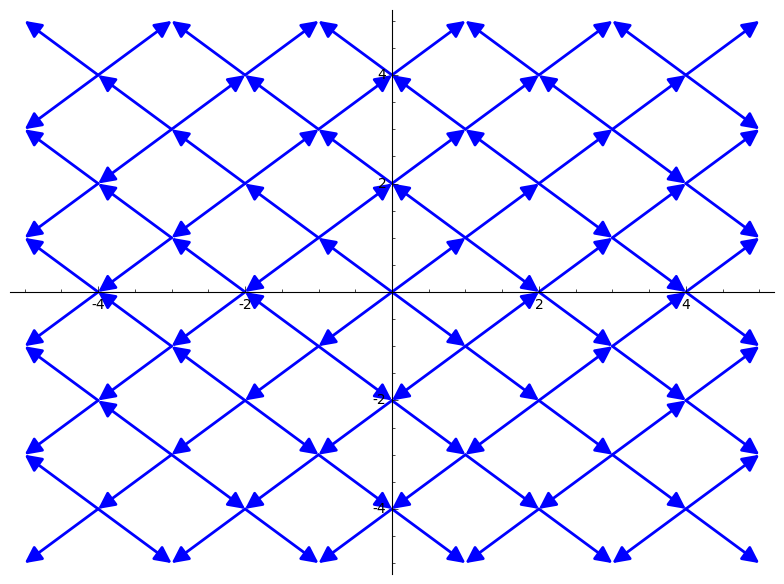

In [155]:
u1 = vector([1,1])
u2 = vector([1,-1])
draw_span([u1,u2])

In [124]:
u1 = vector([1,-1,0])
u2 = vector([0,1,-1])
draw_span([u1,u2])

Graphics3d Object

同樣的  
若 $S = \{{\bf u}_1, {\bf u}_2, {\bf u}_3\}$  
則 $\operatorname{span}(S)$ 通常為一個通過原點的*三維空間*  

若 $S = \{{\bf u}_1, \ldots, {\bf u}_k\}$  
則 $\operatorname{span}(S)$ 通常為一個通過原點的 *$k$ 維空間*（沒有扁掉的話）  

### 超平面
令 $\mathbb{R}^n$ 為所有 $n$ 維向量的集合  
在 $\mathbb{R}^n$ 中的 $n-1$ 條向量 $S = \{{\bf u}_1, \ldots, {\bf u}_{n-1}\}$  
如果 $\operatorname{span}(S)$ 沒有扁掉的話  
則 $\operatorname{span}(S)$ 稱為一個**超平面**

$\mathbb{R}^2$ 中的超平面為通過原點的直線  
$\mathbb{R}^3$ 中的超平面為通過原點的平面  
$\qquad\vdots$  
$\mathbb{R}^n$ 中的超平面為通過原點的 $n-1$ 維空間  

超平面的特點是  
它有唯一一條直線和它垂直  
通常用一個**法向量** ${\bf n}$ 來代表這個直線  

也就是 ${\bf n}\cdot {\bf v}=0$ for all ${\bf v}\in\operatorname{span}(S)$

In [157]:
n = vector([1,1,1])
pic = vector_plot(n, color='red')
pic += draw_span([vector([1,-1,0]), vector([0,1,-1])])
pic

Graphics3d Object

我們平常寫的線性方程式  
$a_1x_1 + \cdots + a_nx_n = 0$  
也可以寫成 ${\bf n}\cdot {\bf v} = 0$  
其中 ${\bf n} = (a_1, \ldots, a_n)$ 是法向量  
而 ${\bf v} = (x_1,\ldots, x_n)$ 代表超平面上的任一個向量

In [148]:
n = vector([1,1,1])
pic = vector_plot(n, color='red')
x,y,z = var('x y z')
equation = (x + y + z == 0)
pic += implicit_plot3d(equation, 
                       (x,-5,5), (y,-5,5), (z,-5,5))
pic += draw_span([vector([1,-1,0]), vector([0,1,-1])])
pic

Graphics3d Object

### 仿射空間
你可能會發現  
先前講的所有*空間*都會通過原點  
如果把一個空間用一個向量 ${\bf p}$ 平移一點  
這樣的空間叫作**仿射空間**

符號上我們會記作  
${\bf p} + \operatorname{span}(S)$  
意思是  
$\{{\bf p} + {\bf v}: {\bf v}\in\operatorname{span}(S)\}$ 

In [161]:
u1 = vector([1,-1,0])
u2 = vector([0,1,-1])
p = vector([1,1,1])
pic = vector_plot(p, color='red')
pic += draw_span([u1,u2], p=p)
pic

Graphics3d Object

## 動手試試看

##### 練習 1

定義一個函數 `draw_plane` 其功能為：  
輸入一個法向量 `n` 和一個空間中的點 `p`  
從 `p` 開始繪製出法向量  
並且繪製出通過 `p` 點且法向量為 `n` 的平面  

最後要將繪製出的圖回傳  

完成以下函數  

```Python
def draw_plane(n, p):
    pic = arrow(p, p + n, color='red')
    
    #find equation (a*x + b*y + c*z == d)
    equation =
    
    pic += implicit_plot3d(equation, (x,p[0]-5,p[0]+5), (y,p[1]-5,p[1]+5), (z,p[2]-5,p[2]+5))
    return pic
```
此函數已完成繪製法向量 `n` 的功能  
只需要找到 `equation`(平面方程式) 即可  

In [2]:
### your answer here